## Veriyi İnceleme

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
#gerekli kütüphaneler

In [9]:
eticaret=pd.read_csv("C:/Users/moonm/ÖzlemElmalı_222802002/Veri Toplama/eticaret_bilgisayar.csv")

In [10]:
eticaret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fiyat              1120 non-null   object 
 1   Ürün Adı           1120 non-null   object 
 2   Kullanım Amaç      1120 non-null   object 
 3   İşletim Sistemi    1120 non-null   object 
 4   Ekran Boyutu       1120 non-null   object 
 5   Ekran Çözünürlüğü  1120 non-null   object 
 6   Ekran Hızı         818 non-null    object 
 7   İşlemci Markası    1120 non-null   object 
 8   İşlemci Serisi     1120 non-null   object 
 9   RAM                1120 non-null   object 
 10  SSD Var mı         1120 non-null   object 
 11  SSD Kapasitesi     1120 non-null   object 
 12  GPU Modeli         1068 non-null   object 
 13  GPU Var mı         1068 non-null   object 
 14  USB 3.0 Var mı     1088 non-null   object 
 15  USB 3.0 Adet       1088 non-null   float64
 16  USB-C Var mı       1118 

In [11]:
#ekran hızı 279   gpu model 43 gpu var mı 43   usb3.0 var mı 31  usb3.0 var mı 31  usbc var mı 2  usbc adet 2   hdmı var mı 25 
#pil gücü 146   pil hücre 314   tane null veri

## Verinin Sütunlarını Düzenleme

In [12]:
eticaret['Fiyat'] = eticaret['Fiyat'].str.replace('.', '').str.replace(',', '.').astype(float)#değeri float yapabilmek için "," "." ile değiştirildi
eticaret['Ekran Boyutu'] = eticaret['Ekran Boyutu'].str.extract('(\d+\.\d+|\d+)').astype(float)#inç kısımları çıkarıldı sayısal veriye döndürüldü
eticaret['RAM'] = eticaret['RAM'].str.replace(' GB', '').astype(int)#gb kısmı çıkarıldı sayısal değere çevirildi
eticaret[['Yükseklik','Genişlik']] = eticaret['Ekran Çözünürlüğü'].str.split(' x ', expand=True)#ekran çözünürlük yükseklikve genişliğe ayrıldı
eticaret['Genişlik'] = eticaret['Genişlik'].str.replace(' Piksel', '').astype(int)#sondaki pixel çıkartıldı
eticaret['Ekran Çözünürlüğü'] = eticaret['Genişlik'].astype(float) * eticaret['Yükseklik'].astype(float)#çözünürlük sayısal veriye döndürüldü
eticaret = eticaret.drop(['Genişlik', 'Yükseklik'], axis=1)#genişlik ve yükseklik kolonlarına ihtiyaç kalmadı
eticaret["USB-C Adet"].fillna(0, inplace=True)#sitede usbc olmayan yereler null dönmüş onlar yerine 0 atandı
eticaret["USB-C Adet"]=eticaret["USB-C Adet"].astype(int)#sayısal veriye çevrildi
eticaret["USB 3.0 Adet"].fillna(0, inplace=True)#sitede usb3.0 olmayan yereler null dönmüş onlar yerine 0 atandı
eticaret["USB 3.0 Adet"]=eticaret["USB 3.0 Adet"].astype(int)#sayısal veriye çevrildi
eticaret=eticaret.drop(["USB-C Var mı","USB 3.0 Var mı","SSD Var mı"],axis=1)#bu sütunlardaki veriler hep var dönmüş o yüzden dataframeden çıkarıldı
eticaret['Ekran Hızı'] = eticaret['Ekran Hızı'].str.replace(' Hz', '').astype(float)#hz kısmı çıkartılıp sayısal veriye döndürüldü
eticaret['Ekran Hızı'].fillna(eticaret['Ekran Hızı'].mean(), inplace=True)#boş değerlere ortalamsı atandı
eticaret['Ekran Hızı'] =eticaret['Ekran Hızı'].astype(int)#sayısal veriye dönüştürüldü
eticaret['Ekran Hızı'].replace(159, 165, inplace=True)#ekran hızı sütundaki değerlerin ortalaması 159.17 fakat böyle bir Hz değeri yok verinin daha doğru olması için ortalamanın en yakın olduğu değeri null değerlere atandı
eticaret['Pil Gücü'] = eticaret['Pil Gücü'].str.replace(' Wh', '').astype(float)#Wh kısmı çıkartıldı sayısal veriye dönüştü
eticaret['Pil Gücü'].fillna(eticaret['Pil Gücü'].mean(), inplace=True)#null değerlere ortalama atandı
eticaret['Pil Hücre Sayısı'] = eticaret['Pil Hücre Sayısı'].str.replace(' Hücreli', '').astype(float)#hüzcreli kısmı çıkartıldı sayısal veriye dönüştürüldü
eticaret['Pil Hücre Sayısı'].fillna(eticaret['Pil Hücre Sayısı'].mode().iloc[0], inplace=True)#null değerlere en çok tekrar eden değer atandı
eticaret['HDMI Var mı'].fillna('Yok', inplace=True)#null değerelere yok atandı
GPU=eticaret["GPU Modeli"]#GPU Modeli ile GPU Var mı stünlarının bilgisi karışmış geçici bir listeyle sütunlar değiştiriliyor
eticaret["GPU Modeli"]=eticaret["GPU Var mı"]
eticaret["GPU Var mı"]=GPU
eticaret["GPU Var mı"].fillna('Yok',inplace=True)#null değerlere yok atandı
eticaret["GPU Modeli"].fillna(eticaret["GPU Modeli"].mode().iloc[0],inplace=True)#null değerlere yok atandı
eticaret["SSD Kapasitesi"]= eticaret['SSD Kapasitesi'].str.extract('(\d+)').astype(float)#TB ve GB ksımlarını çıkartıyoruz
eticaret.loc[eticaret['SSD Kapasitesi'] <= 4, 'SSD Kapasitesi'] *= 1024 #fakat aynı birimden olmaları için TB olanlar da 4'ten küçük olduğu için 1024 ile çarpıp hepsini GB cinsinden yapıyoruz

In [13]:
eticaret.info()#artık null verimiz yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fiyat              1120 non-null   float64
 1   Ürün Adı           1120 non-null   object 
 2   Kullanım Amaç      1120 non-null   object 
 3   İşletim Sistemi    1120 non-null   object 
 4   Ekran Boyutu       1120 non-null   float64
 5   Ekran Çözünürlüğü  1120 non-null   float64
 6   Ekran Hızı         1120 non-null   int32  
 7   İşlemci Markası    1120 non-null   object 
 8   İşlemci Serisi     1120 non-null   object 
 9   RAM                1120 non-null   int32  
 10  SSD Kapasitesi     1120 non-null   float64
 11  GPU Modeli         1120 non-null   object 
 12  GPU Var mı         1120 non-null   object 
 13  USB 3.0 Adet       1120 non-null   int32  
 14  USB-C Adet         1120 non-null   int32  
 15  HDMI Var mı        1120 non-null   object 
 16  Pil Gücü           1120 

In [14]:
#one hot işletim sistemi*,İşlemci Markası*,İşlemci Serisi*,GPU Modeli
#sayısal değer Ekran Boyutu,Ekran Çözünürlüğü,Ekran Hızı,RAM,USB 3.0 Adet,USB-C Adet,Pil Gücü,Pil Hücre Sayısı,SSD Kapasitesi
#label HDMI Var mı*,GPU Var mı*,kullanım amacı*

### Label Encoderla Yapılması Gereken Sütunların Dönüşümü

In [15]:
le=preprocessing.LabelEncoder()

hdmi=eticaret.iloc[:,15].values
hdmi[:]=le.fit_transform(eticaret.iloc[:,15])
eticaret["HDMI Var mı"]=hdmi

gpu=eticaret.iloc[:,12].values
gpu[:]=le.fit_transform(eticaret.iloc[:,12])
eticaret["GPU Var mı"]=gpu

kullanım=eticaret.iloc[:,2].values
kullanım[:]=le.fit_transform(eticaret.iloc[:,2])
eticaret["Kullanım Amaç"]=kullanım
eticaret["Kullanım Amaç"]=eticaret["Kullanım Amaç"].replace(2,0)#aslında 0,1,2 olan label 2'ye indirildi çünkü iş/mobil ve genel kullanım arası biligsayar için bir fark yok
#iş/mobil/genel 0,oyun 1 oldu

### OneHot Encoderla Yapılması Gereken Sütunların Dönüşümü

In [16]:
eticaret['İşletim Sistemi'].value_counts()

İşletim Sistemi
FreeDOS                           380
Windows 11 Home                   306
Windows 11 Pro                    221
Windows 10 Pro                    150
Windows 10 Home                    31
EShell                              8
macOS Ventura                       7
macOS Sonoma                        6
Linux                               3
Endless OS                          3
macOS Catalina                      2
Windows 11 (W10 Pro Opsiyonlu)      1
macOS Monterey                      1
FreeDOS 3.0                         1
Name: count, dtype: int64

In [17]:
#işletim sistemi için çok fazla etiket sayısı olmaması açısından aynı adlı farklı sürümleri aynı adla yazılması için küçük bir düzeltme
eticaret['İşletim Sistemi'] = eticaret['İşletim Sistemi'].apply(lambda x: 'Windows' if 'Windows' in x else x)
eticaret['İşletim Sistemi'] = eticaret['İşletim Sistemi'].apply(lambda x: 'macOS' if 'macOS' in x else x)
eticaret['İşletim Sistemi'] = eticaret['İşletim Sistemi'].apply(lambda x: 'FreeDOS' if 'FreeDOS' in x else x)

In [18]:
isletim=pd.get_dummies(eticaret['İşletim Sistemi'], columns=['EShell', 'Endless OS', 'FreeDOS', 'Linux', 'Windows', 'macOS'])
isletim_ohe=pd.DataFrame(isletim)
eticaret=pd.concat([eticaret,isletim_ohe],axis=1)
eticaret =eticaret.replace({True: 1, False: 0})
eticaret=eticaret.drop(["İşletim Sistemi"],axis=1)

In [19]:
islemciM=pd.get_dummies(eticaret["İşlemci Markası"],columns=["Intel","AMD","Apple"])
islemciM_ohe=pd.DataFrame(islemciM)
eticaret=pd.concat([eticaret,islemciM_ohe],axis=1)
eticaret =eticaret.replace({True: 1, False: 0})
eticaret=eticaret.drop(["İşlemci Markası"],axis=1)

In [20]:
islemciS=pd.get_dummies(eticaret["İşlemci Serisi"],columns=["Intel Core i7","Intel Core i9","Intel Core i5","AMD Ryzen 7","AMD Ryzen 5","AMD Ryzen 9","Apple M2 Max","Apple M3 Pro","Intel Xeon W","Apple M1 Max","Apple M2 Pro"])
islemciS_ohe=pd.DataFrame(islemciS)
eticaret=pd.concat([eticaret,islemciS_ohe],axis=1)
eticaret=eticaret.replace({True: 1, False: 0})
eticaret=eticaret.drop(["İşlemci Serisi"],axis=1)

In [21]:
eticaret['GPU Modeli'].value_counts()

GPU Modeli
NVIDIA GeForce RTX 4060                164
NVIDIA RTX A2000                        92
NVIDIA GeForce RTX 4050                 82
NVIDIA GeForce RTX 3070                 59
NVIDIA GeForce GTX 1650 GDDR6           58
                                      ... 
NVIDIA GeForce RTX 2080 Super Max-Q      1
NVIDIA GeForce RTX 3070 85W              1
NVIDIA GeForce RTX 2070 Super Max-Q      1
NVIDIA GeForce RTX 4090 145W             1
NVIDIA GeForce RTX 3050 Ti 95W           1
Name: count, Length: 97, dtype: int64

In [22]:
eticaret=eticaret.drop(["GPU Modeli"],axis=1)#100 tane labellanması gereken veri var o yüzden tablodan düştü

In [23]:
eticaret=eticaret.drop(["Ürün Adı"],axis=1)

In [24]:
eticaret#bütün veriler sayısal veri haline getirildi

,Fiyat,Kullanım Amaç,Ekran Boyutu,Ekran Çözünürlüğü,Ekran Hızı,RAM,SSD Kapasitesi,GPU Var mı,USB 3.0 Adet,USB-C Adet,...,AMD Ryzen 7,AMD Ryzen 9,Apple M1 Max,Apple M2 Max,Apple M2 Pro,Apple M3 Pro,Intel Core i5,Intel Core i7,Intel Core i9,Intel Xeon W
0,134999.00,1,17.0,4096000.0,240,64,2048.0,0,2,3,...,0,0,0,0,0,0,0,0,1,0
1,138999.00,1,17.0,4096000.0,240,64,2048.0,0,2,3,...,0,0,0,0,0,0,0,0,1,0
2,128186.26,1,17.0,4096000.0,240,32,2048.0,0,2,3,...,0,0,0,0,0,0,0,0,1,0
3,173279.00,1,17.3,8294400.0,144,64,4096.0,0,3,2,...,0,0,0,0,0,0,0,0,1,0
4,148499.01,1,18.0,4096000.0,240,32,2048.0,0,2,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,30799.00,1,15.6,2073600.0,144,8,512.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
1116,73825.92,0,15.6,2073600.0,165,20,500.0,0,2,1,...,0,0,0,0,0,0,0,1,0,0
1117,27441.00,1,15.6,2073600.0,144,16,512.0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
1118,31917.38,0,16.0,4096000.0,165,16,1024.0,1,2,2,...,0,0,0,0,0,0,0,1,0,0


## Öznitelik Seçimi

<Axes: >

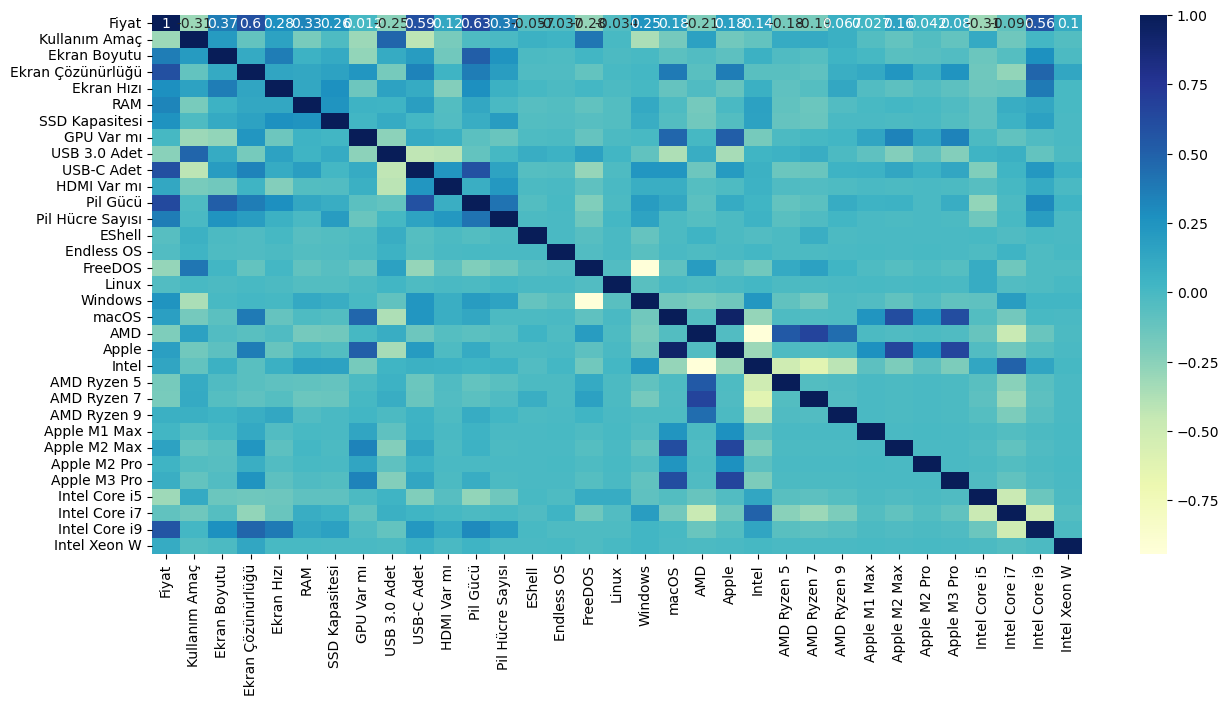

In [25]:
#korelasyon gösterimi 
plt.figure(figsize=(15,7))
numeric_columns = eticaret.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
corr_matrix = eticaret.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [26]:
corr_matrix["Fiyat"].sort_values(ascending=False)

Fiyat                1.000000
Pil Gücü             0.631768
Ekran Çözünürlüğü    0.595335
USB-C Adet           0.593832
Intel Core i9        0.564614
Ekran Boyutu         0.365778
Pil Hücre Sayısı     0.365015
RAM                  0.326825
Ekran Hızı           0.278211
SSD Kapasitesi       0.262235
Windows              0.252792
Apple                0.178835
macOS                0.176191
Apple M2 Max         0.164307
Intel                0.136418
HDMI Var mı          0.124615
Intel Xeon W         0.101587
Apple M3 Pro         0.079817
AMD Ryzen 9          0.067186
Apple M2 Pro         0.041547
Apple M1 Max         0.027054
GPU Var mı           0.011952
Linux               -0.034157
Endless OS          -0.036577
EShell              -0.057463
Intel Core i7       -0.096329
AMD Ryzen 5         -0.183854
AMD Ryzen 7         -0.188696
AMD                 -0.208299
USB 3.0 Adet        -0.248169
FreeDOS             -0.283372
Kullanım Amaç       -0.312933
Intel Core i5       -0.314219
Name: Fiya

In [27]:
#Apple M3 Prodan EShelle kadar değerler aşşırı 0'a yakın o nedenle o sütünları çıkartıyorum
eticaret=eticaret.drop(["Apple M3 Pro","AMD Ryzen 9","Apple M2 Pro","GPU Var mı","Apple M1 Max","Endless OS","Linux","EShell"],axis=1)

In [28]:
eticaret#verimizin model eğitimine geçmeden önceki son hali

,Fiyat,Kullanım Amaç,Ekran Boyutu,Ekran Çözünürlüğü,Ekran Hızı,RAM,SSD Kapasitesi,USB 3.0 Adet,USB-C Adet,HDMI Var mı,...,AMD,Apple,Intel,AMD Ryzen 5,AMD Ryzen 7,Apple M2 Max,Intel Core i5,Intel Core i7,Intel Core i9,Intel Xeon W
0,134999.00,1,17.0,4096000.0,240,64,2048.0,2,3,0,...,0,0,1,0,0,0,0,0,1,0
1,138999.00,1,17.0,4096000.0,240,64,2048.0,2,3,0,...,0,0,1,0,0,0,0,0,1,0
2,128186.26,1,17.0,4096000.0,240,32,2048.0,2,3,0,...,0,0,1,0,0,0,0,0,1,0
3,173279.00,1,17.3,8294400.0,144,64,4096.0,3,2,0,...,0,0,1,0,0,0,0,0,1,0
4,148499.01,1,18.0,4096000.0,240,32,2048.0,2,2,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,30799.00,1,15.6,2073600.0,144,8,512.0,3,1,0,...,1,0,0,1,0,0,0,0,0,0
1116,73825.92,0,15.6,2073600.0,165,20,500.0,2,1,0,...,0,0,1,0,0,0,0,1,0,0
1117,27441.00,1,15.6,2073600.0,144,16,512.0,2,1,0,...,1,0,0,1,0,0,0,0,0,0
1118,31917.38,0,16.0,4096000.0,165,16,1024.0,2,2,0,...,0,0,1,0,0,0,0,1,0,0


In [29]:
eticaret.to_csv("model.csv",index=False)